# Code Challenge

Use AlexNet instead of VGG19

Pick your own content and style images

# COURSE: A deep understanding of deep learning
## SECTION: Style transfer
### LECTURE: Transfering the screaming bathtub
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [2]:
### import libraries

# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T

# to read an image from a url
from imageio import imread

# for number-crunching
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

C:\Users\ugur_\AppData\Local\Temp\ipykernel_36632\3204169295.py:19: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


# Import VGG19 and freeze all layers

In [5]:
# import the model
weights = torchvision.models.AlexNet_Weights.IMAGENET1K_V1
alexnet = torchvision.models.alexnet(weights=weights)

# freeze all layers
for p in alexnet.parameters():
    p.requires_grad = False
  
# set to evaluation mode
alexnet.eval()

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\ugur_/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:07<00:00, 31.1MB/s] 


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [6]:
# send the network to the GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

alexnet.to(device);

# Import two images

In [9]:
# change only the style 
img4content = imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')
img4style   = imread('https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/2560px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')

# initialize the target image and random numbers
img4target = np.random.randint(low=0,high=255,size=img4content.shape,dtype=np.uint8)

print(img4content.shape)
print(img4target.shape)
print(img4style.shape)

C:\Users\ugur_\AppData\Local\Temp\ipykernel_36632\2270349024.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img4content = imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')
C:\Users\ugur_\AppData\Local\Temp\ipykernel_36632\2270349024.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img4style   = imread('https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/2560px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')


(1675, 3000, 3)
(1675, 3000, 3)
(2027, 2560, 3)


In [10]:
## These images are really large, which will make training take a long time. 

# create the transforms
Ts = T.Compose([ T.ToTensor(),
                 T.Resize(256),
                 T.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
               ])

# apply them to the images ("unsqueeze" to make them a 4D tensor) and push to GPU
img4content = Ts( img4content ).unsqueeze(0).to(device)
img4style   = Ts( img4style   ).unsqueeze(0).to(device)
img4target  = Ts( img4target  ).unsqueeze(0).to(device)

print(img4content.shape)
print(img4target.shape)
print(img4style.shape)

torch.Size([1, 3, 256, 458])
torch.Size([1, 3, 256, 458])
torch.Size([1, 3, 256, 323])


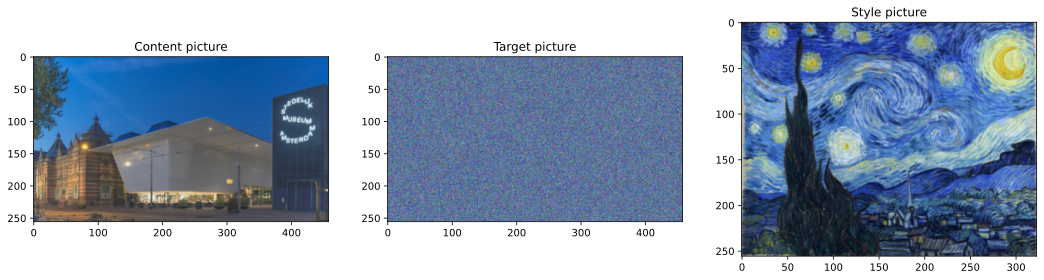

In [11]:
# Let's have a look at the "before" pics
fig,ax = plt.subplots(1,3,figsize=(18,6))

pic = img4content.cpu().squeeze().numpy().transpose((1,2,0))
pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))
ax[0].imshow(pic)
ax[0].set_title('Content picture')

pic = img4target.cpu().squeeze().numpy().transpose((1,2,0))
pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))
ax[1].imshow(pic)
ax[1].set_title('Target picture')

pic = img4style.cpu().squeeze().numpy().transpose((1,2,0))
pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))
ax[2].imshow(pic)
ax[2].set_title('Style picture')

plt.show()

# Functions to extract image feature map activations

In [12]:
# A function that returns feature maps

def getFeatureMapActs(img,net):
  
  # initialize feature maps as a list
  featuremaps = []
  featurenames = []

  convLayerIdx = 0

  # loop through all layers in the "features" block
  for layernum in range(len(net.features)):
    
    # print out info from this layer
    # print(layernum,net.features[layernum])

    # process the image through this layer
    img = net.features[layernum](img)

    # store the image if it's a conv2d layer
    if 'Conv2d' in str(net.features[layernum]):
      featuremaps.append( img )
      featurenames.append( 'ConvLayer_' + str(convLayerIdx) )
      convLayerIdx += 1
  
  return featuremaps,featurenames

In [13]:
# A function that returns the Gram matrix of the feature activation map

def gram_matrix(M):
  
  # reshape to 2D
  _,chans,height,width = M.shape
  M = M.reshape(chans,height*width)  

  # compute and return covariance matrix
  gram = torch.mm(M,M.t()) / (chans*height*width)
  return gram

In [14]:
# inspect the output of the function
featmaps,featnames = getFeatureMapActs(img4content,alexnet)

# print out some info
for i in range(len(featnames)):
  print('Feature map "%s" is size %s'%(featnames[i],(featmaps[i].shape)))

Feature map "ConvLayer_0" is size torch.Size([1, 64, 63, 113])
Feature map "ConvLayer_1" is size torch.Size([1, 192, 31, 56])
Feature map "ConvLayer_2" is size torch.Size([1, 384, 15, 27])
Feature map "ConvLayer_3" is size torch.Size([1, 256, 15, 27])
Feature map "ConvLayer_4" is size torch.Size([1, 256, 15, 27])


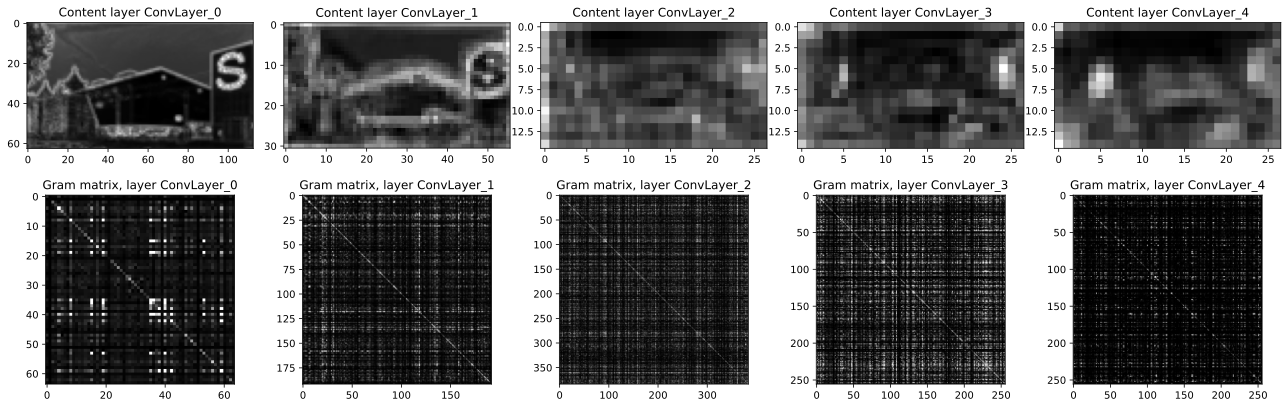

In [15]:
# let's see what the "content" image looks like
contentFeatureMaps,contentFeatureNames = getFeatureMapActs(img4content,alexnet)


fig,axs = plt.subplots(2,5,figsize=(18,6))
for i in range(5):

  # average over all feature maps from this layer, and normalize
  pic = np.mean( contentFeatureMaps[i].cpu().squeeze().numpy() ,axis=0)
  pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))

  axs[0,i].imshow(pic,cmap='gray')
  axs[0,i].set_title('Content layer ' + str(contentFeatureNames[i]))


  ### now show the gram matrix
  pic = gram_matrix(contentFeatureMaps[i]).cpu().numpy()
  pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))

  axs[1,i].imshow(pic,cmap='gray',vmax=.1)
  axs[1,i].set_title('Gram matrix, layer ' + str(contentFeatureNames[i]))

plt.tight_layout()
plt.show()

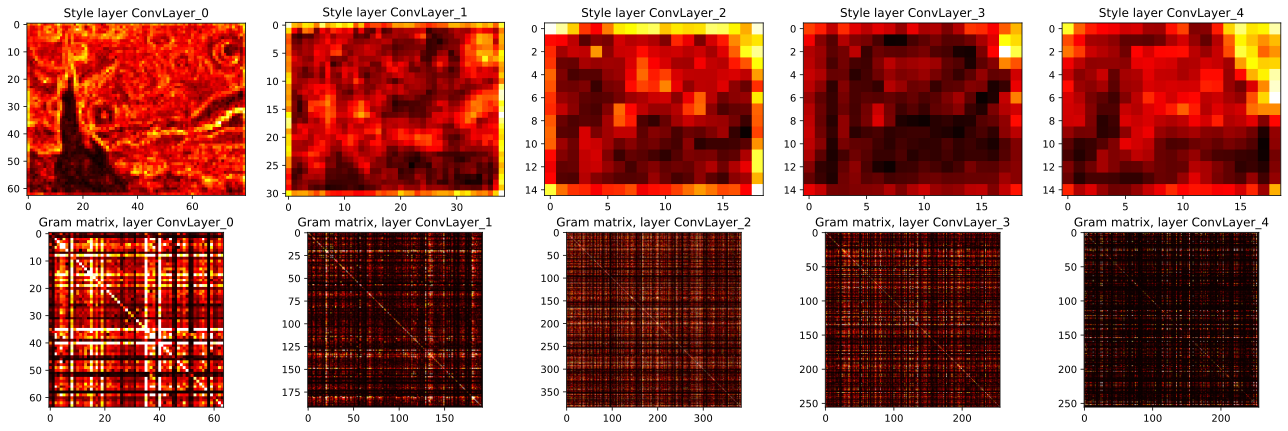

In [16]:

# repeat for the "style" image
styleFeatureMaps,styleFeatureNames = getFeatureMapActs(img4style,alexnet)


fig,axs = plt.subplots(2,5,figsize=(18,6))
for i in range(5):

  # average over all feature maps from this layer, and normalize
  pic = np.mean( styleFeatureMaps[i].cpu().squeeze().numpy() ,axis=0)
  pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))

  axs[0,i].imshow(pic,cmap='hot')
  axs[0,i].set_title('Style layer ' + str(styleFeatureNames[i]))


  ### now show the gram matrix
  pic = gram_matrix(styleFeatureMaps[i]).cpu().numpy()
  pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))

  axs[1,i].imshow(pic,cmap='hot',vmax=.1)
  axs[1,i].set_title('Gram matrix, layer ' + str(styleFeatureNames[i]))

plt.tight_layout()
plt.show()

# Now for the transfer

In [28]:
# which layers to use
layers4content = [ 'ConvLayer_0', 'ConvLayer_1']
layers4style   = [ 'ConvLayer_1','ConvLayer_2']
weights4style  = [      1       ,     .5      ]

In [35]:
# make a copy of the target image and push to GPU
target = img4target.clone()
target.requires_grad = True
target = target.to(device)
styleScaling = 1e7

# number of epochs to train
numepochs = 10000

# optimizer for backprop
optimizer = torch.optim.RMSprop([target],lr=.005)


for epochi in range(numepochs):

  print(f"Epoch {epochi+1}/{numepochs}")
  # extract the target feature maps
  targetFeatureMaps,targetFeatureNames = getFeatureMapActs(target,alexnet)


  # initialize the individual loss components
  styleLoss = 0
  contentLoss = 0

  # loop over layers
  for layeri in range(len(targetFeatureNames)):


    # compute the content loss
    if targetFeatureNames[layeri] in layers4content:
      contentLoss += torch.mean( (targetFeatureMaps[layeri]-contentFeatureMaps[layeri])**2 )


    # compute the style loss
    if targetFeatureNames[layeri] in layers4style:
      
      # Gram matrices
      Gtarget = gram_matrix(targetFeatureMaps[layeri])
      Gstyle  = gram_matrix(styleFeatureMaps[layeri])

      # compute their loss (de-weighted with increasing depth)
      styleLoss += torch.mean( (Gtarget-Gstyle)**2 ) * weights4style[layers4style.index(targetFeatureNames[layeri])]

  
  # combined loss
  combiloss = styleScaling*styleLoss + contentLoss

  # finally ready for backprop!
  optimizer.zero_grad()
  combiloss.backward()
  optimizer.step()


Epoch 1/10000
Epoch 2/10000
Epoch 3/10000
Epoch 4/10000
Epoch 5/10000
Epoch 6/10000
Epoch 7/10000
Epoch 8/10000
Epoch 9/10000
Epoch 10/10000
Epoch 11/10000
Epoch 12/10000
Epoch 13/10000
Epoch 14/10000
Epoch 15/10000
Epoch 16/10000
Epoch 17/10000
Epoch 18/10000
Epoch 19/10000
Epoch 20/10000
Epoch 21/10000
Epoch 22/10000
Epoch 23/10000
Epoch 24/10000
Epoch 25/10000
Epoch 26/10000
Epoch 27/10000
Epoch 28/10000
Epoch 29/10000
Epoch 30/10000
Epoch 31/10000
Epoch 32/10000
Epoch 33/10000
Epoch 34/10000
Epoch 35/10000
Epoch 36/10000
Epoch 37/10000
Epoch 38/10000
Epoch 39/10000
Epoch 40/10000
Epoch 41/10000
Epoch 42/10000
Epoch 43/10000
Epoch 44/10000
Epoch 45/10000
Epoch 46/10000
Epoch 47/10000
Epoch 48/10000
Epoch 49/10000
Epoch 50/10000
Epoch 51/10000
Epoch 52/10000
Epoch 53/10000
Epoch 54/10000
Epoch 55/10000
Epoch 56/10000
Epoch 57/10000
Epoch 58/10000
Epoch 59/10000
Epoch 60/10000
Epoch 61/10000
Epoch 62/10000
Epoch 63/10000
Epoch 64/10000
Epoch 65/10000
Epoch 66/10000
Epoch 67/10000
Epoc

# Let's have a looksie!

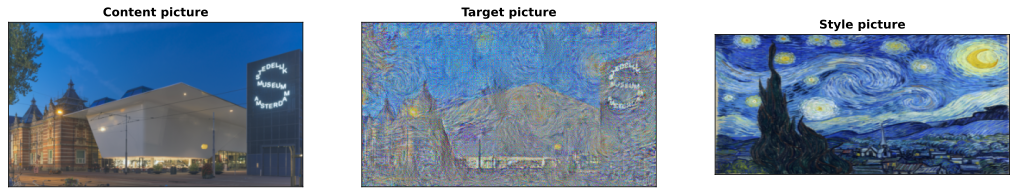

In [36]:
# the "after" pic
fig,ax = plt.subplots(1,3,figsize=(18,11))

pic = img4content.cpu().squeeze().numpy().transpose((1,2,0))
pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))
ax[0].imshow(pic)
ax[0].set_title('Content picture',fontweight='bold')
ax[0].set_xticks([])
ax[0].set_yticks([])

pic = torch.sigmoid(target).cpu().detach().squeeze().numpy().transpose((1,2,0))
ax[1].imshow(pic)
ax[1].set_title('Target picture',fontweight='bold')
ax[1].set_xticks([])
ax[1].set_yticks([])

pic = img4style.cpu().squeeze().numpy().transpose((1,2,0))
pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))
ax[2].imshow(pic,aspect=.6)
ax[2].set_title('Style picture',fontweight='bold')
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()

# Additional explorations

In [ ]:
# 1) The minimization loss has two components (style and content). Modify the code to store these two components in a
#    Nx2 matrix (for N training epochs). Then plot them. This will help you understand and adjust the styleScaling gain
#    factor.
# 
# 2) Change the layers for minimizing losses to content and style images. Do you notice an effect of minimizing the
#    earlier vs. later layers? How about more vs. fewer layers?
# 
# 3) It's pretty neat to see the target image evolve over time. Modify the code to save the target image every, e.g.,
#    100 epochs. Then you can make a series of images showing how the noise transforms into a lovely picture.
# 
# 4) The target picture was initialized as random noise. But it doesn't need to be. It can be initialized to anything
#    else. Try the following target initializations: (1) the content picture; (2) the style picture; (3) a completely
#    different picture (e.g., a picture of you or a cat or the Taj Mahal).
# 